In [18]:
import numpy as np
dataset = "NYCTaxi"
data_path = fr"E:\estudy\ST-SSL\code\ST-SSL\data\{dataset}\train.npz"
x_train = np.load(data_path)["x"]
y_train = np.load(data_path)["y"]
extreme_values_binary_tensor = np.load(data_path)["evs_90"]
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, evs.shape: {extreme_values_binary_tensor.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\estudy\\ST-SSL\\code\\ST-SSL\\data\\NYCTaxi\\train.npz'

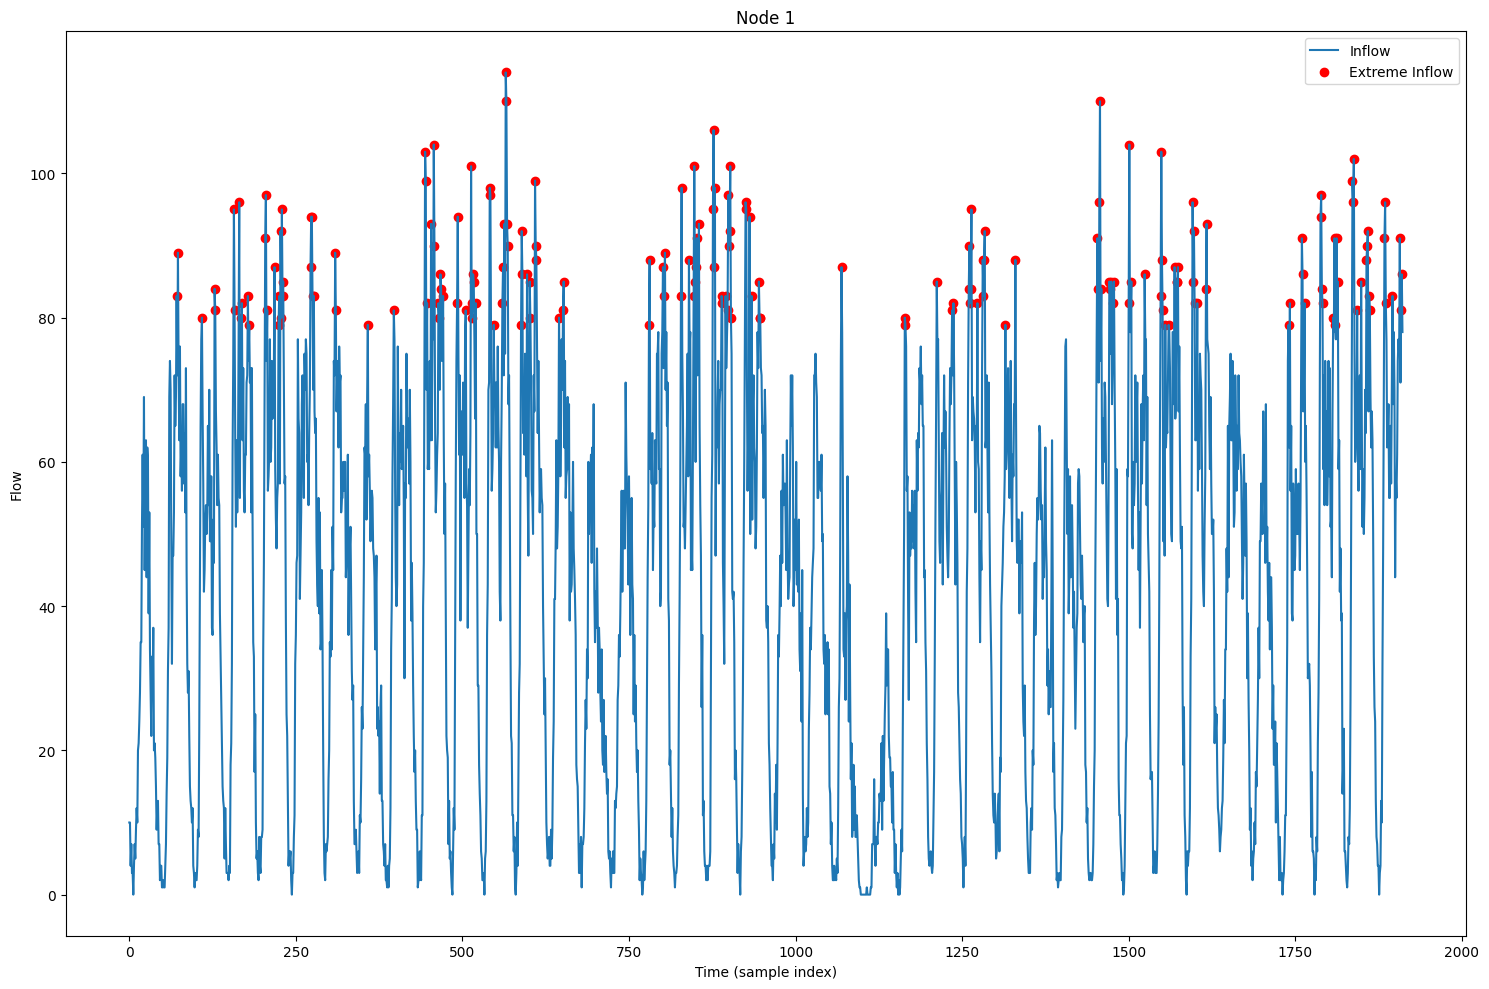

In [2]:
# ## plot from the gt EVs

# import numpy as np
# import matplotlib.pyplot as plt

# # Set up the plot
# plt.figure(figsize=(15, 10))

# # Plotting for the first node (as the loop range is 1, it plots only the first node)
# for node_index in range(1):
#     inflow = y_train[:, 0, node_index, 0]
#     outflow = y_train[:, 0, node_index, 1]
    
#     # Extract extreme indicators for inflow and outflow
#     extreme_inflow_indicator = extreme_values_binary_tensor[:, 0, node_index, 0]
#     # extreme_outflow_indicator = extreme_values_binary_tensor[:, 0, node_index, 1]
    
#     # Identify indices where extreme events occur
#     extreme_inflow_indices = np.where(extreme_inflow_indicator == 1)[0]
#     # extreme_outflow_indices = np.where(extreme_outflow_indicator == 1)[0]

#     # Plotting inflow and outflow
#     plt.subplot(1, 1, node_index + 1)
#     plt.plot(inflow, label='Inflow')
#     # plt.plot(outflow, label='Outflow')

#     # Marking the extreme events
#     plt.scatter(extreme_inflow_indices, inflow[extreme_inflow_indices], color='red', label='Extreme Inflow', marker='o')
#     # plt.scatter(extreme_outflow_indices, outflow[extreme_outflow_indices], color='blue', label='Extreme Outflow', marker='x')

#     plt.title(f'Node {node_index + 1}')
#     plt.xlabel('Time (sample index)')
#     plt.ylabel('Flow')
#     plt.legend()

# plt.tight_layout()
# plt.show()


In [ ]:
# phases = ["pred", "cls", "pred_2", "bias"]
# for phase in phases:
#     init_seed(args.seed)
#     if not torch.cuda.is_available():
#         args.device = 'cpu'

#     ## load dataset
#     dataloader = get_dataloader(
#         data_dir=args.data_dir, 
#         dataset=args.dataset, 
#         batch_size=args.batch_size, 
#         test_batch_size=args.test_batch_size,
#         scalar_type='Standard'
#     )
#     graph = load_graph(args.graph_file, device=args.device)
#     args.num_nodes = len(graph)

#     # args.best_path = fr'E:\estudy\ST-SSL\code\ST-SSL\experiments\NYCTaxi\pred__seed=5\common backbone ablation\best_model_{phase}.pth'
#     args.best_path = fr'D:\omer\ST-SSL\experiments\BJTaxi\pred__seed=5\20240823-182453\common backbone ablation\best_model_{phase}.pth'
#     best_model_dir = os.path.dirname(args.best_path)
#     if best_model_dir not in sys.path:
#         sys.path.insert(0, best_model_dir)
#     from models import STSSL
#     from trainer import Trainer
#     ## init model and set optimizer
#     model = STSSL(args).to(args.device)


#     state_dict = torch.load(
#                     args.best_path,
#                     map_location=torch.device(args.device)
#                 )
#     msg = model.load_state_dict(state_dict['model'], strict=False)
#     # print("Load saved model msg: ", msg)

#     model_parameters = get_model_params([model])
#     optimizer = torch.optim.Adam(
#         params=model_parameters, 
#         lr=args.lr_init, 
#         eps=1.0e-8, 
#         weight_decay=0, 
#         amsgrad=False
#     )


#     _, y_true, y_pred, evs_true, evs_pred, bias, bias_scaled, o_tilde = test(model, dataloader, dataloader['scaler'], graph, args)


#     # evs_true, evs_pred
#     # evs_true.shape

#     from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
#                                 balanced_accuracy_score, roc_auc_score, precision_recall_curve, auc)
#     # Threshold predictions at 0.2
#     # print(evs_pred.shape, evs_true.shape)
#     for flow in ["in", "out"]:
#         _evs_pred = evs_pred[:, 0, :, 0] if flow == "in" else evs_pred[:, 0, :, 1]    
#         _evs_true = evs_true[:, 0, :, 0] if flow == "in" else evs_true[:, 0, :, 1]    
#         evs_pred_binary = (_evs_pred >= 0.25).astype(int)

#         # Flatten the arrays to fit the metrics functions
#         evs_true_flat = _evs_true.flatten()
#         evs_pred_flat = evs_pred_binary.flatten()
#         evs_pred_probs_flat = evs_pred.flatten()  # Use raw probabilities for AUC and precision-recall calculations

#         # Calculate metrics
#         f1 = f1_score(evs_true_flat, evs_pred_flat)
#         balanced_acc = balanced_accuracy_score(evs_true_flat, evs_pred_flat)
        
#         print(f"\n\nPhase: {phase}, flow: {flow}")
#         print("F1 Score:", f1)
#         print("Balanced Accuracy:", balanced_acc)
#         print("\n\n")



In [20]:
init_seed(args.seed)
if not torch.cuda.is_available():
    args.device = 'cpu'

## load dataset
dataloader = get_dataloader(
    data_dir=args.data_dir, 
    dataset=args.dataset, 
    batch_size=args.batch_size, 
    test_batch_size=args.test_batch_size,
    scalar_type='Standard'
)
graph = load_graph(args.graph_file, device=args.device)
args.num_nodes = len(graph)

paths = [
r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=2\20240819-170042\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth",
r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=3\20240819-174735\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth"]
mae_ins = []
mae_outs = []
eee_ins = []
eee_outs = []
f1s_in = []
f1s_out = []
for path in paths:
    args.best_path = path
    best_model_dir = os.path.dirname(args.best_path)
    if best_model_dir not in sys.path:
        sys.path.insert(0, best_model_dir)
    from models import STSSL
    from trainer import Trainer
    ## init model and set optimizer
    model = STSSL(args).to(args.device)


    state_dict = torch.load(
                    args.best_path,
                    map_location=torch.device(args.device)
                )
    msg = model.load_state_dict(state_dict['model'], strict=False)
    # print("Load saved model msg: ", msg)

    model_parameters = get_model_params([model])
    optimizer = torch.optim.Adam(
        params=model_parameters, 
        lr=args.lr_init, 
        eps=1.0e-8, 
        weight_decay=0, 
        amsgrad=False
    )

    print("\n\n\nresults for model: ", path)
    mae_in, mae_out, eee_in, eee_out, f1_in, f1_out = test(model, dataloader, dataloader['scaler'], graph, args)
    mae_ins.append(mae_in)  
    mae_outs.append(mae_out)
    eee_ins.append(eee_in)  
    eee_outs.append(eee_out)
    f1s_in.append(f1_in)
    f1s_out.append(f1_out)
mae_in = sum(mae_ins) / len(mae_ins)
mae_out = sum(mae_outs) / len(mae_outs)
eee_in = sum(eee_ins) / len(eee_ins)
eee_out = sum(eee_outs) / len(eee_outs)
print("\n\naverage mae_in: ", mae_in, "+-", np.std(mae_ins))
print("average mae_out: ", mae_out, "+-", np.std(mae_outs))
print("\naverage eee_in: ", eee_in, "+-", np.std(eee_ins))
print("average eee_out: ", eee_out, "+-", np.std(eee_outs))
print("\naverage f1: ", sum(f1s_in) / len(f1s_in), "+-", np.std(f1s_in))
print("\naverage f1: ", sum(f1s_out) / len(f1s_out), "+-", np.std(f1s_out))

# evs_true, evs_pred
# evs_true.shape

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                            balanced_accuracy_score, roc_auc_score, precision_recall_curve, auc)
# Threshold predictions at 0.2
# print(evs_pred.shape, evs_true.shape)
# for flow in ["in", "out"]:
#     _evs_pred = evs_pred[:, 0, :, 0] if flow == "in" else evs_pred[:, 0, :, 1]    
#     _evs_true = evs_true[:, 0, :, 0] if flow == "in" else evs_true[:, 0, :, 1]    
#     evs_pred_binary = (_evs_pred >= 0.25).astype(int)


#     # Flatten the arrays to fit the metrics functions
#     evs_true_flat = _evs_true.flatten()
#     evs_pred_flat = evs_pred_binary.flatten()
#     evs_pred_probs_flat = evs_pred.flatten()  # Use raw probabilities for AUC and precision-recall calculations

#     # Calculate metrics
#     f1 = f1_score(evs_true_flat, evs_pred_flat)
#     balanced_acc = balanced_accuracy_score(evs_true_flat, evs_pred_flat)
    
#     print(f"\n\nflow: {flow}")
#     print("F1 Score:", f1)
#     print("Balanced Accuracy:", balanced_acc)
#     print("\n\n")



not indexing
using 90percent evs
not indexing
using 90percent evs
not indexing
using 90percent evs


!!Scaling is NOT off!!


data['x_train'].shape:  (1912, 35, 200, 2) (1912, 1, 200, 2) 

!!train shuffle is True!!


in else
in else
in else
in else



results for model:  D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=2\20240819-170042\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth
Finished test phase, with samples: 546
F1 Score for EVS_in: 0.4374674761491761
F1 Score for EVS_in: 0.47880256099671226
test, MAE: 4.83, test MAPE: 21.5945%
y_true.shape:  (546, 1, 200, 2) y_pred.shape:  (546, 1, 200, 2)
OUTFLOW, MAE: 4.55, MAPE: 20.6692%
EXTREME INFLOW, MAE: 7.92, MAPE: 20.4197%
EXTREME OUTFLOW, MAE: 6.89, MAPE: 18.2374%
in else
in else
in else
in else



results for model:  D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=3\20240819-174735\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth
Finished test phase, with sa

In [16]:
import os
nyctaxi_folder_path = r"D:\omer\ST-SSL\experiments\NYCBike2"

# Function to list directories only
def list_final_folders(path):
    for root, dirs, files in os.walk(path):
        # Check if the directory has no subdirectories
        # if not dirs:
        if not dirs:
            last_folder = os.path.basename(root)
            # Match exactly the folder name (without extra words)
            # if last_folder == "sconv with skip (learnable weights), train v3":
            if "sconv with skip (learnable weights), sconv bias init zero train v2" in root and "gumbell" not in root and "frechet" not in root:
                root = os.path.join(root, "best_model_bias.pth")
                print(f"r\"{root}\"")

# Call the function
list_final_folders(nyctaxi_folder_path)

r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=1\20240819-161440\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth"
r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=2\20240819-170042\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth"
r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=3\20240819-174735\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth"
r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=4\20240819-184918\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth"
r"D:\omer\ST-SSL\experiments\NYCBike2\pred__seed=5\20240819-192926\sconv with skip (learnable weights), sconv bias init zero train v2\best_model_bias.pth"


In [17]:


import warnings 
warnings.filterwarnings('ignore')
import os
# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
import sys
sys.path.append('.')
sys.path.append('..')
import yaml 
import argparse
import traceback
import time
import torch

from lib.dataloader import get_dataloader
from lib.utils import (
    init_seed,
    get_model_params,
    load_graph, 
)
import time
import yaml

# Define your configurations directly
configs = {
    'config_filename': 'configs/NYCBike2.yaml',
    'S_Loss': 0,
    'T_Loss': 0,
    'seed': 1,
    'comment': "testing",
    'cheb_order': 3,
    'graph_init': "8_neighbours",
    'self_attention_flag': True,
    'cross_attention_flag': False,
    'feedforward_flag': False,
    'layer_norm_flag': False,
    'additional_sa_flag': False,
    'learnable_flag': False,
    'rank': 0,
    'pos_emb_flag': False,
    'add_8': True,
    'add_eye': False,
    'add_x_encoder': False,
    'freeze_encoder': False,
    'ipe': 1,
    "mode": "test"
}

# Optionally print the starting experiment configurations
print(f"Starting experiment with configurations in {configs['config_filename']}...")

# Simulate a brief pause
time.sleep(3)

# Load configurations from a file (if necessary, or you could just use the dictionary as is)
with open(configs['config_filename'], 'r') as file:
    file_configs = yaml.load(file, Loader=yaml.FullLoader)
    configs.update(file_configs)

# You can add logic to modify configurations based on your conditions here
experiment_name = "pred_"
if configs['S_Loss'] == 1:
    experiment_name += "+S"
if configs['T_Loss'] == 1:
    experiment_name += "+T"
experiment_name += f"_seed={configs['seed']}"

configs['comment'] = "noComment"
configs['ipe'] = 1000
configs['loss'] = "mae"
configs['threshold_adj_mx'] = False
configs['affinity_conv'] = False
configs["experimentName"] = experiment_name
configs["mode"] = "test"
configs["load_path"] = None

# Print the final configuration to start the experiment
print(f"Starting experiment with configurations {configs}...")
args = argparse.Namespace(**configs)

Starting experiment with configurations in configs/NYCBike2.yaml...
Starting experiment with configurations {'config_filename': 'configs/NYCBike2.yaml', 'S_Loss': 0, 'T_Loss': 0, 'seed': 1, 'comment': 'noComment', 'cheb_order': 3, 'graph_init': '8_neighbours', 'self_attention_flag': True, 'cross_attention_flag': False, 'feedforward_flag': False, 'layer_norm_flag': False, 'additional_sa_flag': False, 'learnable_flag': False, 'rank': 0, 'pos_emb_flag': False, 'add_8': True, 'add_eye': False, 'add_x_encoder': False, 'freeze_encoder': False, 'ipe': 1000, 'mode': 'test', 'device': 'cuda', 'best_path': 'None', 'debug': False, 'data_dir': 'data', 'dataset': 'NYCBike2', 'input_length': 17, 'batch_size': 32, 'test_batch_size': 32, 'graph_file': 'data/NYCBike2/adj_mx.npz', 'num_nodes': 200, 'row': 20, 'col': 10, 'd_input': 2, 'd_output': 2, 'd_model': 64, 'dropout': 0.3, 'percent': 0.1, 'shm_temp': 0.5, 'nmb_prototype': 10, 'yita': 0.5, 'start_epoch': 0, 'num_epochs': 1000, 'epochs': 1000, 'lr_i

In [18]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from lib.metrics import test_metrics
from sklearn.metrics import f1_score


def test(model, dataloader, scaler, graph, args):
    model.eval()
    evs_true = []
    evs_pred = []
    y_pred = []
    y_true = []
    bias_pred = []
    o_tilde = []
    with torch.no_grad():
        prev_len = 0
        for phase in ["test"]:
            for batch_idx, (data, target, evs, b) in enumerate(dataloader[phase]):
                repr1, repr2 = model(data, graph)     
                # print(f"repr1.shape: {repr1.shape}, evs.shape: {evs.shape}")           
                pred_output = model.predict(repr1, repr2, "bias")
                og_predicted = model.predict_o_tilde(repr1)
                evs_predicted = model.get_evs(repr2)
                bias = model.get_bias(repr1)
                # bias=torch.zeros_like(pred_output)
                y_true.append(target)
                y_pred.append(pred_output)
                evs_true.append(evs)
                evs_pred.append(evs_predicted)
                bias_pred.append(bias)
                o_tilde.append(og_predicted)
            print(f"Finished {phase} phase, with samples: {len(torch.cat(y_true, dim=0))-prev_len}")
            prev_len = len(torch.cat(y_true, dim=0))

    # y_true = torch.cat(y_true, dim=0).cpu().numpy()
    # y_pred = torch.cat(y_pred, dim=0).cpu().numpy()
    evs_true = torch.cat(evs_true, dim=0).cpu().numpy()
    evs_pred = torch.cat(evs_pred, dim=0).cpu().numpy()
    # Flatten the arrays to fit the metrics functions
    evs_true_in = evs_true[..., 0]
    evs_true_out = evs_true[..., 1]
    evs_pred_in = evs_pred[..., 0]
    evs_pred_out = evs_pred[..., 1]
    evs_true_flat_in = evs_true_in.flatten()
    evs_pred_flat_in = evs_pred_in.flatten()
    evs_pred_flat_in = (evs_pred_flat_in >= 0.25).astype(int)
    # Calculate F1 score
    f1_in = f1_score(evs_true_flat_in, evs_pred_flat_in)
    print("F1 Score for EVS_in:", f1_in)
    evs_true_flat_out = evs_true_out.flatten()
    evs_pred_flat_out = evs_pred_out.flatten()
    evs_pred_flat_out = (evs_pred_flat_out >= 0.25).astype(int)
    # Calculate F1 score
    f1_out = f1_score(evs_true_flat_out, evs_pred_flat_out)
    print("F1 Score for EVS_in:", f1_out)
    bias = scaler.inverse_transform(torch.cat(bias_pred, dim=0)).cpu().numpy()
    bias_scaled = bias * evs_true
    y_true = scaler.inverse_transform(torch.cat(y_true, dim=0)).cpu().numpy()
    y_pred = scaler.inverse_transform(torch.cat(y_pred, dim=0)).cpu().numpy()
    o_tilde = scaler.inverse_transform(torch.cat(o_tilde, dim=0)).cpu().numpy()
    # bias_pred = scaler.inverse_transform(torch.cat(bias_pred, dim=0)).cpu().numpy()
    mask = np.where(y_true > (5), True, False)
    # true = true[mask]
    # pred = pred[mask]
    test_results = []
    # inflow
    mae_in, mape = test_metrics(y_pred[..., 0], y_true[..., 0])
    print("test, MAE: {:.2f}, test MAPE: {:.4f}%".format(mae_in, mape*100))
    test_results.append([mae_in, mape])
    
    print("y_true.shape: ", y_true.shape, "y_pred.shape: ", y_pred.shape)
    # outflow 
    mae_out, mape = test_metrics(y_pred[..., 1], y_true[..., 1])
    print("OUTFLOW, MAE: {:.2f}, MAPE: {:.4f}%".format(mae_out, mape*100))
    # test_results.append([mae, mape])
    extreme_mask = evs_true == 1 
    y_true_extreme_inflow = y_true[..., 0][extreme_mask[..., 0]]
    y_pred_extreme_inflow = y_pred[..., 0][extreme_mask[..., 0]]

    if len(y_true_extreme_inflow) > 0:  # Ensure there are extreme events to compute on
        mae_extreme_in, mape_extreme_in = test_metrics(y_pred_extreme_inflow, y_true_extreme_inflow)
        print("EXTREME INFLOW, MAE: {:.2f}, MAPE: {:.4f}%".format(mae_extreme_in, mape_extreme_in * 100))
    else:
        print("No extreme events found for inflow")

    # Outflow Extreme Value Error
    y_true_extreme_outflow = y_true[..., 1][extreme_mask[..., 1]]
    y_pred_extreme_outflow = y_pred[..., 1][extreme_mask[..., 1]]

    if len(y_true_extreme_outflow) > 0:  # Ensure there are extreme events to compute on
        mae_extreme_out, mape_extreme_out = test_metrics(y_pred_extreme_outflow, y_true_extreme_outflow)
        print("EXTREME OUTFLOW, MAE: {:.2f}, MAPE: {:.4f}%".format(mae_extreme_out, mape_extreme_out * 100))
    else:
        print("No extreme events found for outflow")
    # return np.stack(test_results, axis=0), y_true, y_pred, evs_true, evs_pred, bias, bias_scaled, o_tilde
    return mae_in, mae_out, mae_extreme_in, mae_extreme_out, f1_in, f1_out


In [58]:
_, y_true, y_pred, evs_true, evs_pred, bias, bias_scaled, o_tilde = test(model, dataloader, dataloader['scaler'], graph, args)

Finished test phase, with samples: 546
test, MAE: 11.79, test MAPE: 16.5958%
y_true.shape:  (546, 1, 200, 2) y_pred.shape:  (546, 1, 200, 2)
OUTFLOW, MAE: 9.65, MAPE: 17.8491%


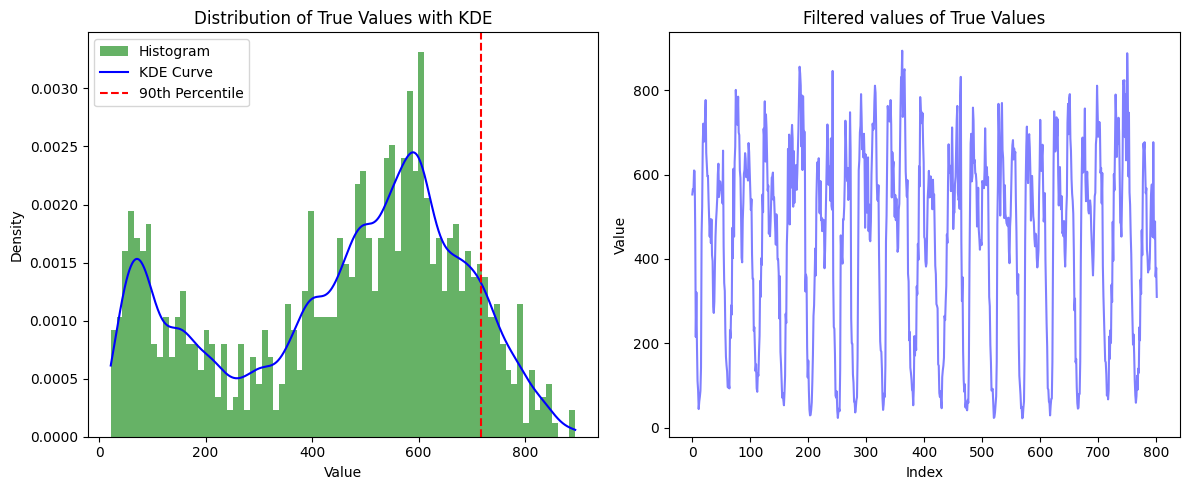

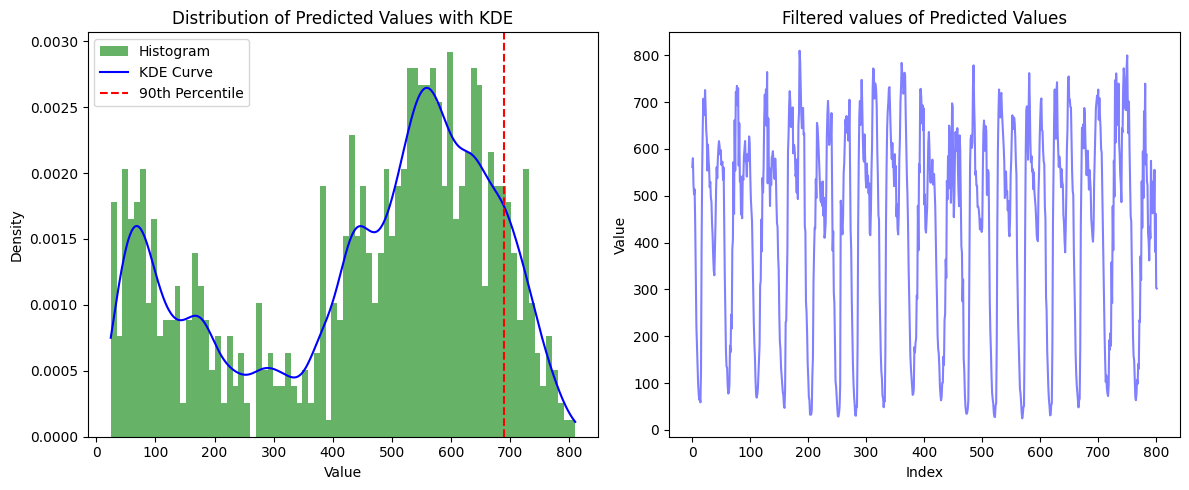

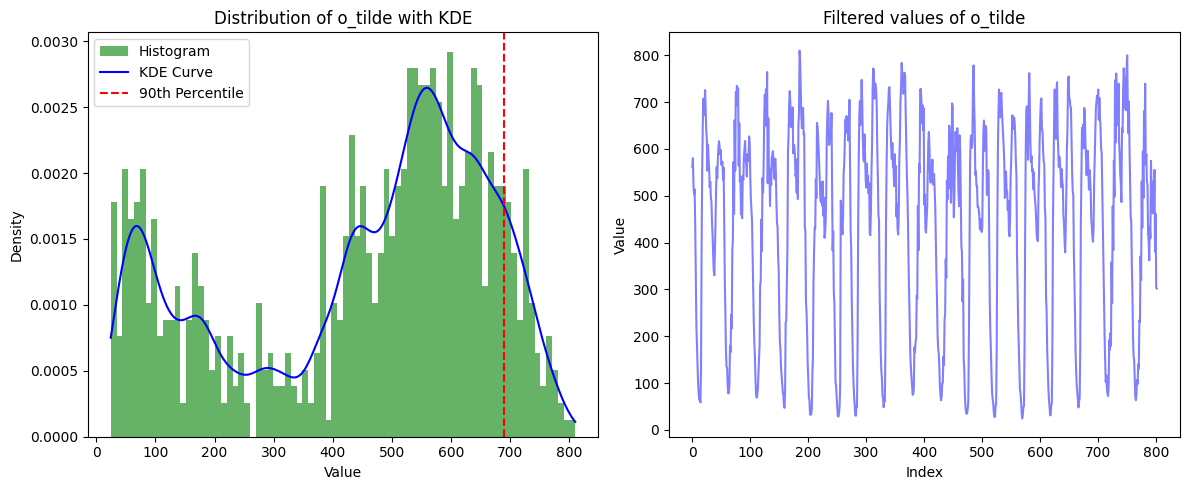

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming y_true, y_pred, and o_tilde are already defined as numpy arrays
# List of arrays with their corresponding labels
data = [
    (y_true, 'True Values'),
    (y_pred, 'Predicted Values'),
    (o_tilde, 'o_tilde')
]

# Iterate over the list and plot each
for array, label in data:
    # Extract the specific slice and filter the values
    a = array[:, 0, 45, 0]
    a = a[a > 5]
    
    # Calculate the 90th percentile
    percentile_90 = np.percentile(a, 90)

    # Create a figure with two subplots: one for the histogram/KDE, one for the raw values plot
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the histogram of variable 'a'
    ax[0].hist(a, bins=80, density=True, alpha=0.6, color='g', label='Histogram')

    # Generate the KDE (Kernel Density Estimate)
    kde = gaussian_kde(a, bw_method=0.1)  # Adjust bandwidth with bw_method
    x_range = np.linspace(a.min(), a.max(), 1000)

    # Plot the KDE curve
    ax[0].plot(x_range, kde(x_range), color='blue', label='KDE Curve')

    # Add a vertical line at the 90th percentile
    ax[0].axvline(x=percentile_90, color='r', linestyle='--', label='90th Percentile')

    # Add labels, title, and legend for the histogram/KDE plot
    ax[0].set_xlabel('Value')
    ax[0].set_ylabel('Density')
    ax[0].set_title(f'Distribution of {label} with KDE')
    ax[0].legend()

    # Plot the filtered raw data as a scatter plot in the second subplot
    ax[1].plot(np.arange(len(a)), a, 'b-', markersize=2, alpha=0.5)
    ax[1].set_xlabel('Index')
    ax[1].set_ylabel('Value')
    ax[1].set_title(f'Filtered values of {label}')

    # Display the plots
    plt.tight_layout()
    plt.show()


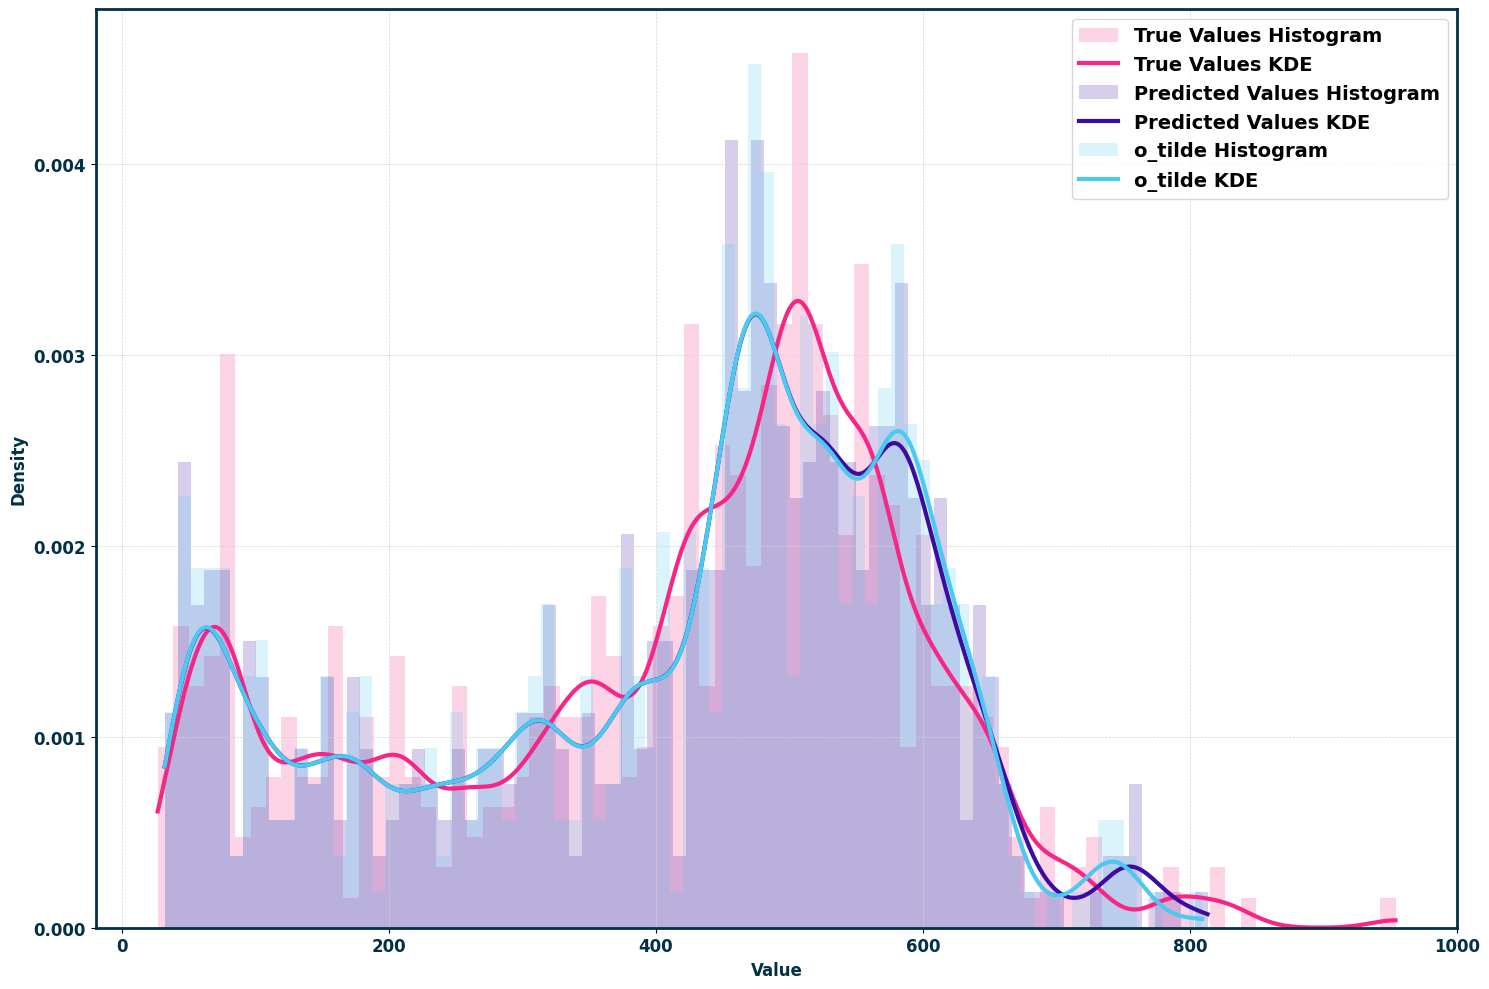

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming y_true, y_pred, and o_tilde are already defined as numpy arrays
# List of arrays with their corresponding labels and colors for plotting
data = [
    (y_true, 'True Values', '#f72585'),
    (y_pred, 'Predicted Values', '#3a0ca3'),
    (o_tilde, 'o_tilde', '#4cc9f0')
]
plt.figure(figsize=(15, 10))  # Adjust the size as needed

# Iterate over the list and plot each on the same figure
for array, label, color in data:
    # Extract the specific slice and filter the values
    a = array[:, 0, 45, 1]
    a = a[a > 5]
    
    # Calculate the 90th percentile for the current dataset
    percentile_90 = np.percentile(a, 90)

    # Plot the histogram of variable 'a' on the first subplot
    plt.hist(a, bins=80, density=True, alpha=0.2, color=color, label=f'{label} Histogram')

    # Generate the KDE (Kernel Density Estimate)
    kde = gaussian_kde(a, bw_method=0.1)  # Adjust bandwidth with bw_method
    x_range = np.linspace(a.min(), a.max(), 1000)

    # Plot the KDE curve for the current dataset
    plt.plot(x_range, kde(x_range), color=color, label=f'{label} KDE', lw=3, alpha=1)

    # Add a vertical line at the 90th percentile for the current dataset
    # plt.axvline(x=percentile_90, color=color, linestyle='--', label=f'{label} 90th Percentile')

# Add labels, title, and legend for the histogram/KDE plot
plt.xlabel('Value', fontsize=12, fontweight='bold', color="#023047")
plt.ylabel('Density', fontsize=12, fontweight='bold', color="#023047")
# plt.title('Comparison of Distributions (Histogram & KDE)')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
# Set the font size and weight for the axis labels
plt.xticks(fontsize=12, fontweight='bold', color="#023047")
plt.yticks(fontsize=12, fontweight='bold', color="#023047")
# Set the border color of the plot

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#023047')
    spine.set_linewidth(2)

# Move legend outside the plot
legend = plt.legend(loc='best', fontsize=14)
# Set the font weight for the legend labels to bold
for label in legend.get_texts():
    label.set_fontweight('bold')
# Display the plots
plt.tight_layout()
plt.show()


(546, 1, 200, 2)
masked_y_true.shape:  (250, 1, 200) masked_y_pred.shape:  (250, 1, 200)


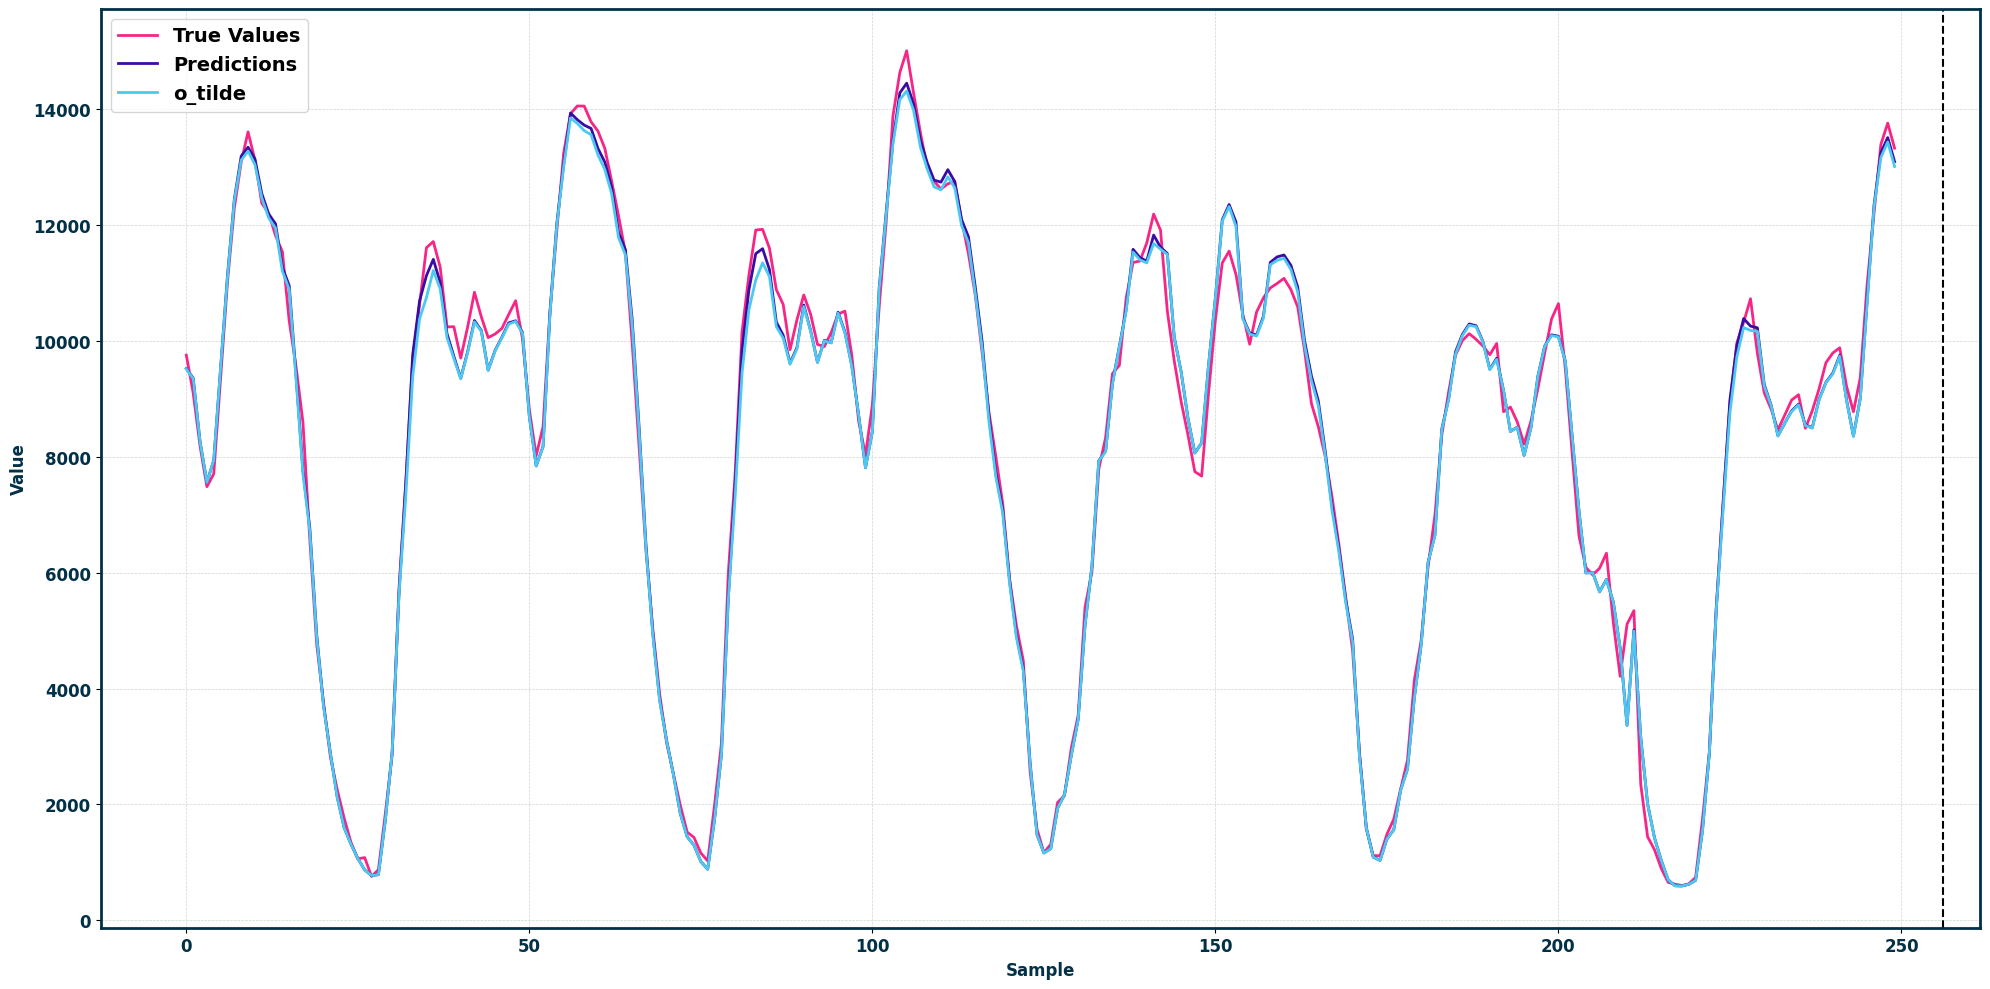

In [33]:
print(y_true.shape)
_y_true, _y_pred, _o_tilde = y_true, y_pred, o_tilde
# _y_true, _y_pred, _o_tilde = _y_true[:, :, :, 0], _y_pred[:, :, :, 0], _o_tilde[:, :, :, 0]
_y_true, _y_pred, _o_tilde = _y_true[0:250, :, :, 1], _y_pred[0:250, :, :, 1], _o_tilde[0:250, :, :, 1]
mask = _y_true > 5
# Apply the mask to y_true and y_pred to filter values
masked_y_true = np.where(mask, _y_true, np.nan)  # Replace unmasked values with NaN
masked_y_pred = np.where(mask, _y_pred, np.nan)  # Same for y_pred
masked_o_tilde = np.where(mask, _o_tilde, np.nan)  # Same for y_pred
print("masked_y_true.shape: ", masked_y_true.shape, "masked_y_pred.shape: ", masked_y_pred.shape)
# Sum and flatten the masked values for plotting
# Using np.nansum to ignore NaN values in summation
summed_masked_y_true = np.nansum(masked_y_true, axis=2).flatten()
summed_masked_y_pred = np.nansum(masked_y_pred, axis=2).flatten()
summed_masked_o_tilde = np.nansum(masked_o_tilde, axis=2).flatten()
# Set figure size for better resolution
plt.figure(figsize=(20, 10))  # Adjust the size as needed

# Plot with adjusted colors, linewidths, and linestyles
plt.plot(summed_masked_y_true, label='True Values', color="#f72585", linewidth=2, linestyle='-', alpha=1)
plt.plot(summed_masked_y_pred, label='Predictions', color='#3a0ca3', linewidth=2, linestyle='-', alpha=1)
plt.plot(summed_masked_o_tilde, label='o_tilde', color='#4cc9f0', linewidth=2, linestyle='-', alpha=1)

# Plot vertical lines at 1888 and 1888+256
# plt.axvline(x=1888, color='black', linestyle='--')
# plt.axvline(x=1888+256, color='black', linestyle='--')
plt.axvline(x=256, color='black', linestyle='--')
# Labels
# Set faint grid lines
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
# Set the font size and weight for the axis labels
plt.xticks(fontsize=12, fontweight='bold', color="#023047")
plt.yticks(fontsize=12, fontweight='bold', color="#023047")
plt.xlabel("Sample", fontsize=12, fontweight='bold', color="#023047")
plt.ylabel("Value", fontsize=12, fontweight='bold', color="#023047")
# Set the border color of the plot

for spine in plt.gca().spines.values():
    spine.set_edgecolor('#023047')
    spine.set_linewidth(2)

# Move legend outside the plot
legend = plt.legend(loc='best', fontsize=14)
# Set the font weight for the legend labels to bold
for label in legend.get_texts():
    label.set_fontweight('bold')
# Set the font size and weight for the axis labels

# Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Set up the plot
# plt.figure(figsize=(20, 55))

# s, e = 150, 350
# node_indices = [59, 51, 72, 50, 28, 41, 42, 49, 58, 43, 67, 33, 27, 44, 19, 34, 66, 35, 26, 52]
# # node_indices = [i for i in range(25, 50)]
# for i, node_index in enumerate(node_indices):
#     inflow = y_true[s:e, 0, node_index, 0]
#     inflow_pred = y_pred[s:e, 0, node_index, 0]
#     inflow_o_tilde = o_tilde[s:e, 0, node_index, 0]
#     inflow_bias = bias[s:e, 0, node_index, 0]
#     inflow_bias_scaled = bias_scaled[s:e, 0, node_index, 0]

#     inflow_evs = evs_pred[s:e, 0, node_index, 0]
#     extreme_inflow_indicator = evs_pred[s:e, 0, node_index, 0]
#     extreme_inflow_indicator_true = evs_true[s:e, 0, node_index, 0]
    
#     extreme_inflow_indices = np.where(extreme_inflow_indicator >= .5)[0]
#     extreme_inflow_indices_true = np.where(extreme_inflow_indicator_true == 1)[0]

#     # Plotting inflow
#     ax1 = plt.subplot(len(node_indices), 1, i + 1)
#     ax1.plot(inflow, label='Inflow')
#     ax1.plot(inflow_pred, label='Inflow_pred')
#     ax1.plot(inflow_o_tilde, label='o_tilde')
#     ax1.plot(inflow_bias, label='bias')
#     ax1.plot(inflow_bias_scaled, label='bias_scaled')
#     # ax1.scatter(extreme_inflow_indices_true, inflow[extreme_inflow_indices_true], color='green', label='Extreme Inflow _ gt', marker='o')
#     # ax1.scatter(extreme_inflow_indices, inflow[extreme_inflow_indices], color='red', label='Extreme Inflow _ pred', marker='x')
    
#     ax1.set_title(f'Node {node_index}')
#     ax1.set_xlabel('Time (sample index)')
#     ax1.set_ylabel('Flow')

#     # Create a second y-axis for the extreme value scale
#     ax2 = ax1.twinx()
#     ax2.plot(inflow_evs, label='evs indicator', color='purple', linestyle='--')
#     ax2.set_ylabel('EVS (0-1 scale)', color='purple')
#     ax2.tick_params(axis='y', labelcolor='purple')

#     # Adding legend separately for clarity
#     lines_1, labels_1 = ax1.get_legend_handles_labels()
#     lines_2, labels_2 = ax2.get_legend_handles_labels()
#     ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# plt.tight_layout()
# plt.show()


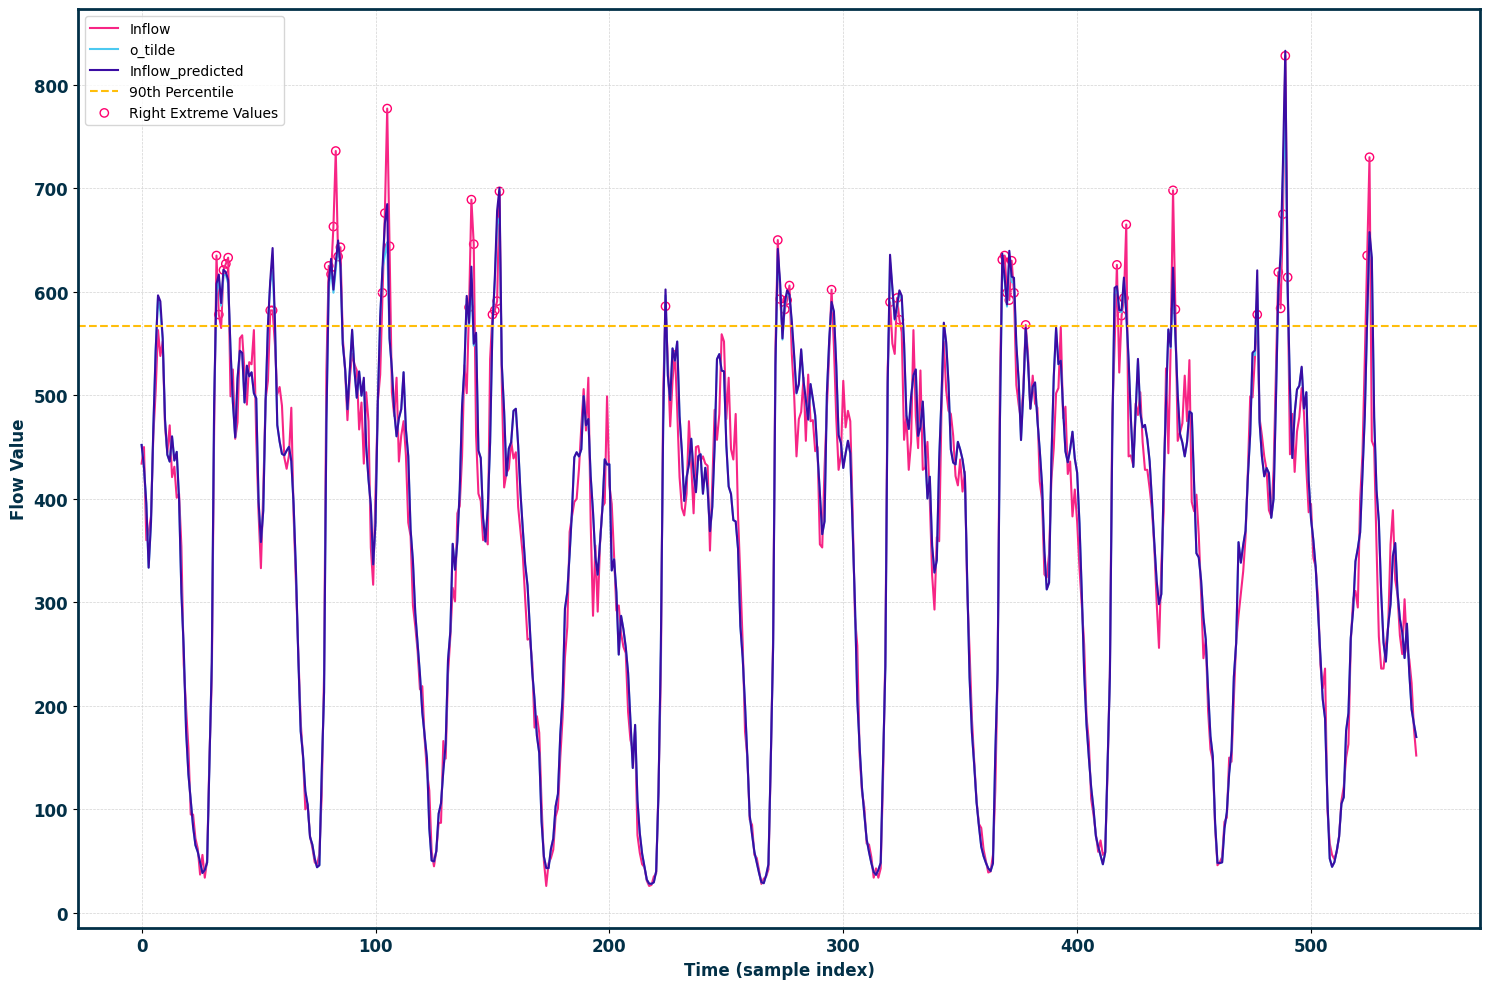

In [37]:
## plot from the newly defined binary tensor

import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train and extreme_indicator_tensor are defined with the same shape
# and extreme_indicator_tensor contains 1 where there's an extreme event and 0 otherwise

# Set up the plot
plt.figure(figsize=(15, 10))

# Plotting for the first node (as the loop range is 1, it plots only the first node)
for node_index in range(1):
    node_index=67
    inflow = y_true[:, 0, node_index, 1]
    percentile_90 = np.percentile(inflow, 90)
    inflow = y_true[0:1250, 0, node_index, 1]
    inflow_pred = o_tilde[0:1250, 0, node_index, 1]
    inflow_pred_bias = y_pred[0:1250, 0, node_index, 1]
    # outflow = y_train[:, 0, node_index, 1]
    
    # Plot a horizontal line at the 90th percentile
    
    # Extract extreme indicators for inflow and outflow
    # extreme_inflow_indicator = evs_pred[0:500, 0, node_index, 0]
    extreme_inflow_indicator_true = evs_true[0:1250, 0, node_index, 1]
    # print("extreme_inflow_indicator", extreme_inflow_indicator)
    # extreme_outflow_indicator = extreme_values_binary_tensor[:, 0, node_index, 1]
    
    # Identify indices where extreme events occur
    # extreme_inflow_indices = np.where(extreme_inflow_indicator >= .2)[0]
    extreme_inflow_indices_true = np.where(extreme_inflow_indicator_true == 1)[0]
    # extreme_outflow_indices = np.where(extreme_outflow_indicator == 1)[0]

    # data = [
    # (y_true, 'True Values', '#f72585'),
    # (y_pred, 'Predicted Values', '#3a0ca3'),
    # (o_tilde, 'o_tilde', '#4cc9f0')
    # ]
    # Plotting inflow and outflow
    # plt.subplot(1, 1, node_index + 1)
    plt.plot(inflow, label='Inflow', color='#f72585')
    plt.plot(inflow_pred, label='o_tilde', color='#4cc9f0')
    plt.plot(inflow_pred_bias, label='Inflow_predicted', color='#3a0ca3')
    # plt.plot(outflow, label='Outflow')
    plt.axhline(y=percentile_90, color='#ffbe0b', linestyle='--', label='90th Percentile')

    # Marking the extreme events
    # plt.scatter(extreme_inflow_indices_true, inflow[extreme_inflow_indices_true], color='green', label='Extreme Inflow _ gt', marker='o')
    # plt.scatter(extreme_inflow_indices, inflow[extreme_inflow_indices], color='#ff006e', label='Extreme Inflow _ pred', marker='o')
    # Marking the extreme events with hollow markers
    plt.scatter(extreme_inflow_indices_true, inflow[extreme_inflow_indices_true], color='#ff006e', label='Right Extreme Values', marker='o', facecolors='none', edgecolors='#ff006e')
    # plt.scatter(extreme_outflow_indices, outflow[extreme_outflow_indices], color='blue', label='Extreme Outflow', marker='x')
    plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
    # Set the font size and weight for the axis labels
    plt.xticks(fontsize=12, fontweight='bold', color="#023047")
    plt.yticks(fontsize=12, fontweight='bold', color="#023047")
    plt.xlabel("Time (sample index)", fontsize=12, fontweight='bold', color="#023047")
    plt.ylabel("Flow Value", fontsize=12, fontweight='bold', color="#023047")
    # Set the border color of the plot

    for spine in plt.gca().spines.values():
        spine.set_edgecolor('#023047')
        spine.set_linewidth(2)

    # Move legend outside the plot
    legend = plt.legend(loc='best', fontsize=14)
    # Set the font weight for the legend labels to bold
    for label in legend.get_texts():
        label.set_fontweight('bold')
    # Set the font size and weight for the axis labels

    # Show the plot
    plt.tight_layout()  # Adjust layout to make room for the legend
    plt.legend()

plt.tight_layout()
plt.show()


evaluating the classifier

In [54]:
# evs_true, evs_pred
# evs_true.shape

import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, precision_recall_curve, auc)
# Threshold predictions at 0.2
print(evs_pred.shape, evs_true.shape)
evs_pred_binary = (evs_pred >= 0.25).astype(int)

# Flatten the arrays to fit the metrics functions
evs_true_flat = evs_true.flatten()
evs_pred_flat = evs_pred_binary.flatten()
evs_pred_probs_flat = evs_pred.flatten()  # Use raw probabilities for AUC and precision-recall calculations

# Calculate metrics
accuracy = accuracy_score(evs_true_flat, evs_pred_flat)
precision = precision_score(evs_true_flat, evs_pred_flat)
recall = recall_score(evs_true_flat, evs_pred_flat)
f1 = f1_score(evs_true_flat, evs_pred_flat)
balanced_acc = balanced_accuracy_score(evs_true_flat, evs_pred_flat)
roc_auc = roc_auc_score(evs_true_flat, evs_pred_probs_flat)

# Precision-Recall Curve and AUC
precision_points, recall_points, _ = precision_recall_curve(evs_true_flat, evs_pred_probs_flat)
auc_pr = auc(recall_points, precision_points)

# Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Balanced Accuracy:", balanced_acc)
print("ROC AUC:", roc_auc)
print("Precision-Recall AUC:", auc_pr)



(546, 1, 200, 2) (546, 1, 200, 2)
Accuracy: 0.935242673992674
Precision: 0.484801912568306
Recall: 0.6258358439268131
F1 Score: 0.5463643070212015
Balanced Accuracy: 0.7908197828850291
ROC AUC: 0.913735831368474
Precision-Recall AUC: 0.5995255908105824


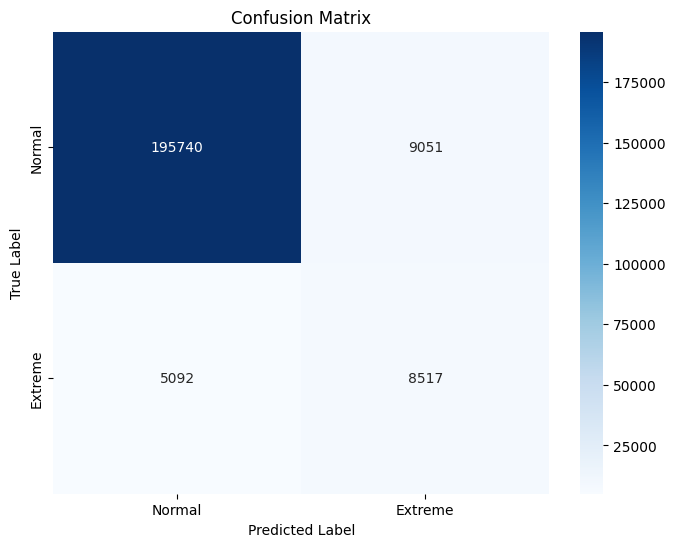

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
# Example data, replace these with your actual data
# evs_pred_binary = (evs_pred >= 0.25).astype(int)       # Threshold predictions at 0.2     
# Flatten the arrays
evs_true_flat = evs_true.flatten()
evs_pred_flat = evs_pred_flat.flatten()

# Calculate confusion matrix
conf_matrix = confusion_matrix(evs_true_flat, evs_pred_flat)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Normal", "Extreme"], yticklabels=["Normal", "Extreme"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


(546, 1, 200, 2) (546, 1, 200, 2)
Accuracy: 0.9405769230769231
Precision: 0.5202230626241907
Recall: 0.5963700492321258
F1 Score: 0.5557001027045532
Balanced Accuracy: 0.7799102957461419
ROC AUC: 0.8952224260262203
Precision-Recall AUC: 0.5842100971633446


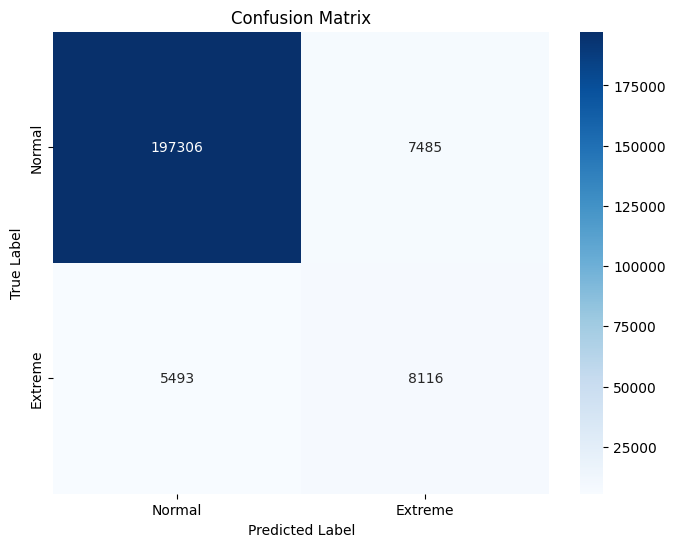

In [59]:
# evs_true, evs_pred
# evs_true.shape

import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
                             balanced_accuracy_score, roc_auc_score, precision_recall_curve, auc)
# Threshold predictions at 0.2
print(evs_pred.shape, evs_true.shape)
evs_pred_binary = (evs_pred >= 0.25).astype(int)

# Flatten the arrays to fit the metrics functions
evs_true_flat = evs_true.flatten()
evs_pred_flat = evs_pred_binary.flatten()
evs_pred_probs_flat = evs_pred.flatten()  # Use raw probabilities for AUC and precision-recall calculations

# Calculate metrics
accuracy = accuracy_score(evs_true_flat, evs_pred_flat)
precision = precision_score(evs_true_flat, evs_pred_flat)
recall = recall_score(evs_true_flat, evs_pred_flat)
f1 = f1_score(evs_true_flat, evs_pred_flat)
balanced_acc = balanced_accuracy_score(evs_true_flat, evs_pred_flat)
roc_auc = roc_auc_score(evs_true_flat, evs_pred_probs_flat)

# Precision-Recall Curve and AUC
precision_points, recall_points, _ = precision_recall_curve(evs_true_flat, evs_pred_probs_flat)
auc_pr = auc(recall_points, precision_points)

# Display the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Balanced Accuracy:", balanced_acc)
print("ROC AUC:", roc_auc)
print("Precision-Recall AUC:", auc_pr)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
# Example data, replace these with your actual data
# evs_pred_binary = (evs_pred >= 0.25).astype(int)       # Threshold predictions at 0.2     
# Flatten the arrays
evs_true_flat = evs_true.flatten()
evs_pred_flat = evs_pred_flat.flatten()

# Calculate confusion matrix
conf_matrix = confusion_matrix(evs_true_flat, evs_pred_flat)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Normal", "Extreme"], yticklabels=["Normal", "Extreme"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


In [ ]:
for t in np.arange(0, 1, 0.05):
    # Example data, replace these with your actual data
    print(t)
    evs_pred_binary = (evs_pred >= t).astype(int)       # Threshold predictions at 0.2

    # Flatten the arrays
    evs_true_flat = evs_true.flatten()
    evs_pred_flat = evs_pred_binary.flatten()

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(evs_true_flat, evs_pred_flat)

    # Plotting the confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Normal", "Extreme"], yticklabels=["Normal", "Extreme"])
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()
